## Sentiment Analysis for Paper Reviews

https://www.frontiersin.org/articles/10.3389/fdata.2019.00045/full

In [1]:
import requests
import json
import time
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import spacy
# Load the installed model "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

In [3]:
#using VADER for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
#import dataframe
df_all=pd.read_pickle('df_all.pkl')

In [5]:
#change official decision text into a list of sentences
decisions=df_all['dec_txt'].to_list()

In [7]:
def sentiment(text):
    #generate sentence spans fom text
    doc=nlp(text)
    sen=[sent.text for sent in doc.sents]
    num_sen=len(sen)
    
    if num_sen==0:
        return 0
    else:
    
        #obtain polarity of each sentence from vader analyzer
        analyzer = SentimentIntensityAnalyzer()

        comp=0    
        for sentence in sen:
            vs = analyzer.polarity_scores(sentence)
            comp+=vs['compound']
    #         print(vs)

        #compute average
        comp=comp/num_sen  

        return comp

>positive sentiment: compound score >= 0.05  
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)  
negative sentiment: compound score <= -0.05

In [8]:
#obtain list of all compound scores for each decision text
sen_scores=[]

for text in decisions:
    score=sentiment(text)
    sen_scores.append(score)

In [28]:
df_all['decision_sentiment']=sen_scores

In [59]:
import pickle

with open('decision_sentiment.pkl', 'wb') as f:
    pickle.dump(sen_scores, f)

In [14]:
#change official decision text into a list of sentences
reviews=df_all['bld_text'].to_list()

#obtain list of all compound scores for each set of reviews
review_scores=[]

for mul_reviews in reviews:
    all_scores=0
    #get sentment compund score for each review
    for text in mul_reviews:
        score=sentiment(text)
        all_scores+=score
    #take average over all reviews
    if len(mul_reviews)==0:
        avg_score=0
    else: 
        avg_score=all_scores/len(mul_reviews)
    review_scores.append(avg_score)

In [29]:
df_all['review_sentiment']=review_scores

In [60]:
with open('review_sentiment.pkl', 'wb') as f:
    pickle.dump(review_scores, f)

In [46]:
df_all['type_review'] = np.where(df_all['year']==2017, 'single_blind', 'double_blind')

In [47]:
df_all.head()

,index,forum,title,authors,keywords,dec,dec_txt,dec_confidence,dec_title,bld_ratings,bld_text,bld_title,year,decision_sentiment,review_sentiment,type_review
0,0,HJWHIKqgl,Generative Models and Model Criticism via Opti...,"[Dougal J. Sutherland, Hsiao-Yu Tung, Heiko St...",[unsupervised learning],Accept (Poster),This paper presents two ways that MMDs can be ...,nan,ICLR committee final decision,"[6: Marginally above acceptance threshold, 8: ...",[This paper provides an interesting idea to us...,"[interesting paper, Interesting paper with a g...",2017,0.123275,0.161820,single_blind
1,1,SyK00v5xx,A Simple but Tough-to-Beat Baseline for Senten...,"[Sanjeev Arora, Yingyu Liang, Tengyu Ma]","[natural language processing, unsupervised lea...",Accept (Poster),A new method for sentence embedding that is si...,nan,ICLR committee final decision,"[7: Good paper, accept, 7: Good paper, accept,...",[This is a good paper with an interesting prob...,"[Accept, Interesting model and analysis, Accept]",2017,0.529200,0.127357,single_blind
2,2,Hkg4TI9xl,A Baseline for Detecting Misclassified and Out...,"[Dan Hendrycks, Kevin Gimpel]",[computer vision],Accept (Poster),The paper presents an approach that uses the s...,nan,ICLR committee final decision,"[6: Marginally above acceptance threshold, 6: ...",[The authors propose the use of statistics of ...,[Paper explores the problem of classifier accu...,2017,0.000000,0.173518,single_blind
3,3,Hk1iOLcle,MS MARCO: A Human-Generated MAchine Reading CO...,"[Tri Nguyen, Mir Rosenberg, Xia Song, Jianfeng...",[],Reject,Though the dataset is likely to have a large i...,nan,ICLR committee final decision,"[6: Marginally above acceptance threshold, 6: ...",[Paper Summary: \nThis paper presents a new la...,"[Review, , Need human performance, comparison ...",2017,0.100625,0.185682,single_blind
4,4,H178hw9ex,Dynamic Steerable Frame Networks,"[Jörn-Henrik Jacobsen, Bert De Brabandere, Arn...","[computer vision, deep learning]",Reject,This paper studies how to incorporate local in...,nan,ICLR committee final decision,"[5: Marginally below acceptance threshold, 4: ...",[This paper presents an improved formulation o...,"[review, , Interesting approach for adaptable ...",2017,0.069817,0.149944,single_blind


## Analysis

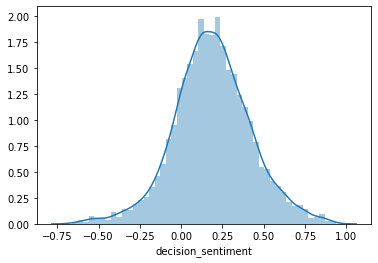

In [20]:
#distribution of sentiment
#x = pd.Series(df[''], name="decision_sentiment")
ax = sns.distplot(df['decision_sentiment'])


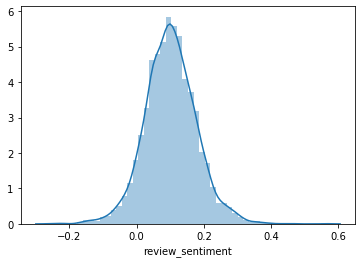

In [22]:
ax = sns.distplot(df['review_sentiment'])

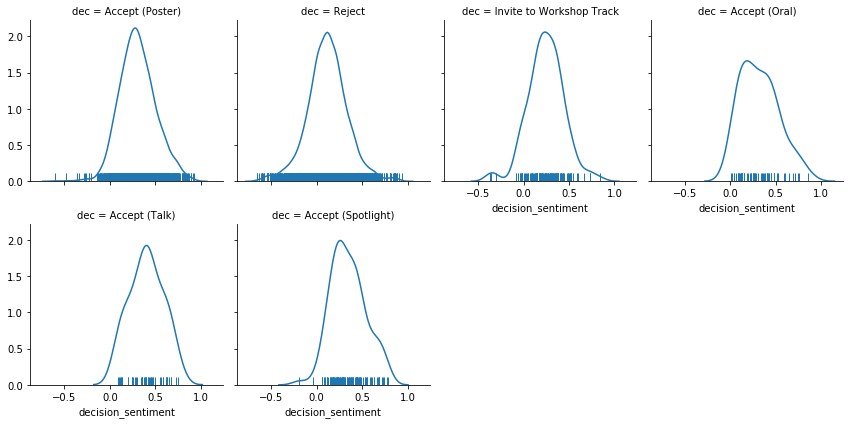

In [23]:
g = sns.FacetGrid(df, col='dec', col_wrap=4)
g.map(sns.distplot, 'decision_sentiment', hist=False, rug=True)

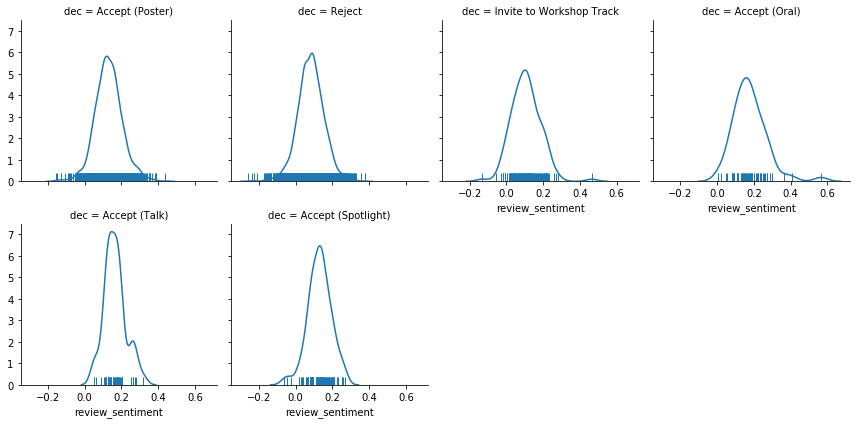

In [24]:
g = sns.FacetGrid(df, col='dec', col_wrap=4)
g.map(sns.distplot, 'review_sentiment', hist=False, rug=True)

In [51]:
# recast into long format 
df_plot = df_all[['dec','review_sentiment', 'decision_sentiment' ]].melt(['dec'], var_name='cols',  value_name='vals')

In [52]:
df_plot.head()

,dec,cols,vals
0,Accept (Poster),review_sentiment,0.161820
1,Accept (Poster),review_sentiment,0.127357
2,Accept (Poster),review_sentiment,0.173518
3,Reject,review_sentiment,0.185682
4,Reject,review_sentiment,0.149944


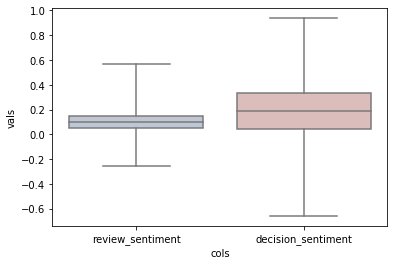

In [53]:
sns.boxplot(x="cols", y="vals", data=df_plot,
            whis="range", palette="vlag")

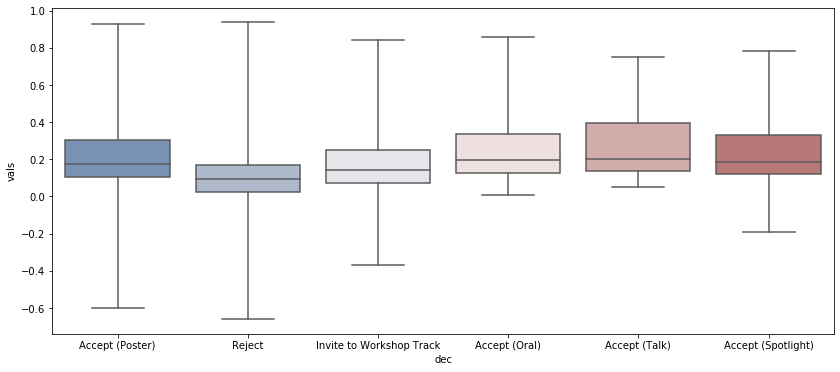

In [45]:
f, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x="dec", y="vals", data=df_plot,
            whis="range", palette="vlag")

In [55]:
# recast into long format 
df_plot = df_all[['type_review','review_sentiment', 'decision_sentiment',  ]].melt(['type_review'], var_name='cols',  value_name='vals')

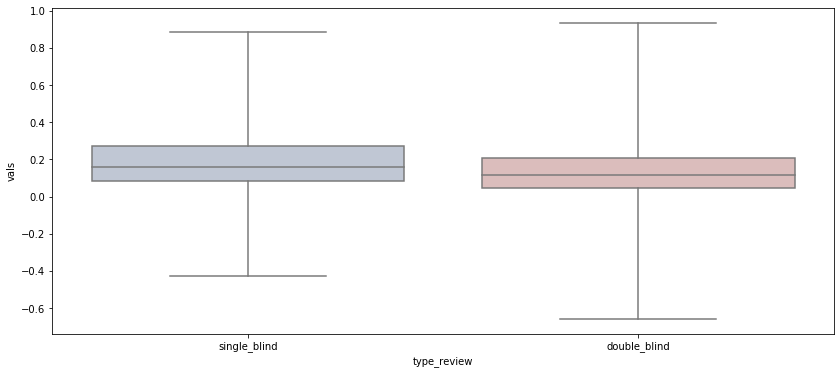

In [56]:
f, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x="type_review", y="vals", data=df_plot,
            whis="range", palette="vlag")

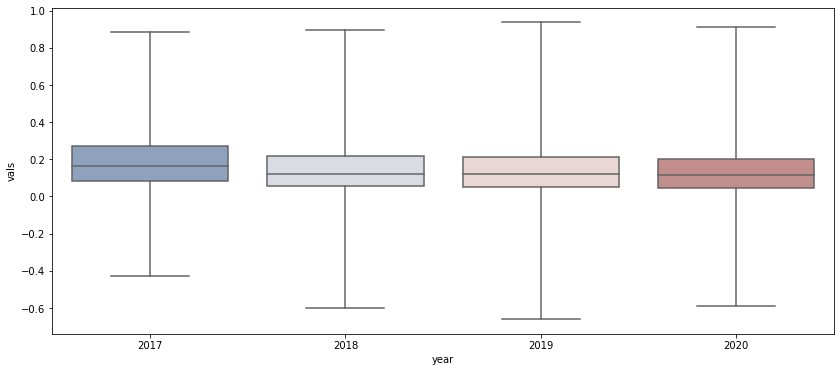

In [58]:
# recast into long format 
df_plot = df_all[['year','review_sentiment', 'decision_sentiment',  ]].melt(['year'], var_name='cols',  value_name='vals')
f, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x="year", y="vals", data=df_plot,
            whis="range", palette="vlag")